In [108]:
import pandas as pd

In [109]:
# Liest den Census-Datensatz aus einer CSV-Datei ein und erstellt ein DataFrame:
# - index_col=False: keine Spalte wird als Index verwendet
data = pd.read_csv('../Data/census.data', header=None, index_col=False,
                    names=['age', 'workclass', 'fnlwgt',
                             'education', 'education-num', 'marital- status', 'occupation',
                             'relationship', 'race', 'gender', 'capital-gain',
                             'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [110]:
my_data = data[['age', 'workclass', 'gender', 'income']] # Erstellt ein Dataframe mit 4 Features
print(my_data.head()) #gibt die ersten 5 Reihen zurück
my_data.info() # Datentypen/Spalten/Nullwerte
print(my_data.describe(include='all')) # Deskriptive Statistik (Mean, Median, Count etc.)-> mit include='all'" auch für kategorische feature
# mit include = all -> 3 zusätzliche Metriken (unique = Anzahl einzigartige Werte, top = Modus, freq = wie oft top vorkommt)
my_data['workclass'].unique() # Welche Werte kann ein Feature annehmen?
my_data['gender'].unique()
my_data['income'].unique()

   age          workclass   gender  income
0   39          State-gov     Male   <=50K
1   50   Self-emp-not-inc     Male   <=50K
2   38            Private     Male   <=50K
3   53            Private     Male   <=50K
4   28            Private   Female   <=50K
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        32561 non-null  int64 
 1   workclass  32561 non-null  object
 2   gender     32561 non-null  object
 3   income     32561 non-null  object
dtypes: int64(1), object(3)
memory usage: 1017.7+ KB
                 age workclass gender  income
count   32561.000000     32561  32561   32561
unique           NaN         9      2       2
top              NaN   Private   Male   <=50K
freq             NaN     22696  21790   24720
mean       38.581647       NaN    NaN     NaN
std        13.640433       NaN    NaN     NaN
min        17.000000     

array([' <=50K', ' >50K'], dtype=object)

In [111]:
##### Binarisieren Sie die 3 kategorialen Variablen.
#
# Binarisierung (One-Hot-Encoding, Dummy-Variablen-Ansatz)
# Kategorische Variablen -> numerische Variablen
#
# Beispiel: Rot / Blau / Grün -> "001 / 010 / 100"
# -> ("ist_grün" -> J/N, "ist_blau" -> J/N, "ist_grün" -> J/N).
# Damit wird zudem dieser Feature auf 3 aufgeblasen

# Pandas-Funktion „get_dummies()”.
my_data_num = pd.get_dummies(my_data)

In [112]:
# Workclass war ein Feature (eine Spalte) vorhin
# Jetzt: 9 Spalten (1 Spalte pro Feature Label)
my_data_num.info()
my_data['workclass'].unique()
# Age ist gleich geblieben (nummerischer Feature)
my_data['age'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          32561 non-null  int64
 1   workclass_ ?                 32561 non-null  bool 
 2   workclass_ Federal-gov       32561 non-null  bool 
 3   workclass_ Local-gov         32561 non-null  bool 
 4   workclass_ Never-worked      32561 non-null  bool 
 5   workclass_ Private           32561 non-null  bool 
 6   workclass_ Self-emp-inc      32561 non-null  bool 
 7   workclass_ Self-emp-not-inc  32561 non-null  bool 
 8   workclass_ State-gov         32561 non-null  bool 
 9   workclass_ Without-pay       32561 non-null  bool 
 10  gender_ Female               32561 non-null  bool 
 11  gender_ Male                 32561 non-null  bool 
 12  income_ <=50K                32561 non-null  bool 
 13  income_ >50K                 32561 non-null  b

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

# -------------------------------Discretization--------------------

In [113]:
import pandas as pd
import sklearn.preprocessing as pre
import matplotlib.pyplot as plt

In [114]:
# Selektiert nur numerische Features
num_data = data.select_dtypes(include=['int64', 'float64'])
num_data.info()
num_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education-num   32561 non-null  int64
 3   capital-gain    32561 non-null  int64
 4   capital-loss    32561 non-null  int64
 5   hours-per-week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [115]:
##### Wir selektieren nur die ersten 2 numerische features
num_data_12 = num_data.iloc[:, :2] # "," Trennen Spalten- und Zeilenindex (iloc[min_zeilen:max_zeilen, min_spalten:max_spalten]).
# Hier wird mit "2" die ersten 2 Spalten selektiert mit Index 0 bis 1 (2 nicht eingeschlossen)


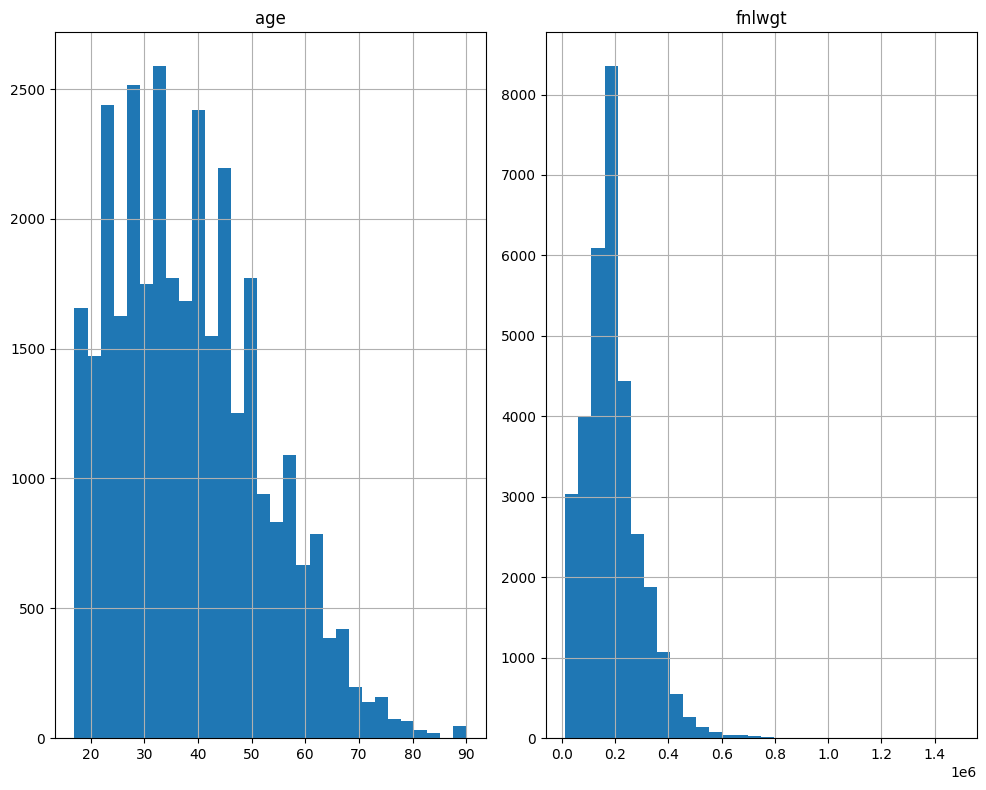

In [11]:
# Mit .to_numpy() DataFrame in ein numpy ndarray umwandeln
# KBinsDiscretizer() funktioniert nur mit ndarrays
num_data_12_array = num_data_12.to_numpy()
type(num_data_12_array) # numpy.ndarray
num_data_12_array.dtype # dtype(‚int64‘)
num_data_12_array.shape # (32561, 2) - 2 numerische features

# Erstellen wir ein Histogramm aller Merkmale:
num_data_12.hist(bins=30, figsize=(10,8)) # "bins" = anzahl bins
# Wenn man keine bins angibt, wird es automatisch equal width binning mit 10 bins
plt.tight_layout()
plt.show()
# Beide sind rechtsschief
# Rechtsschiefe Verteilung = Mittelwert > Median
# Linksschiefe Verteilung = Mittelwert < Median

In [12]:
##### Equal Width Binning

# Initialize
ewb = pre.KBinsDiscretizer(n_bins=3, strategy='uniform', encode='ordinal')
#"n_bins" Anzahl Bins,
#"uniform" gibt allen bins die gleiche breite über die spannweite der features
# "ordinal" Die Bins werden nach Zahlen benannt (0, 1, 2) -> int64

# fit
ewb.fit(num_data_12_array)
# Berechnet die Bin-Grenzen und speichert sie im ewb ab
# Gibt die Bin Edges an - Ein Array pro Bin mit den Bin-Grenzen
print(ewb.bin_edges_)

# transform
num_data_12_array_ewb = ewb.transform(num_data_12_array)
# Die nummerische Werte werden zu den Bins zugeordnet

# WICHTIGER HINWEIS:
#   Da die Bins in Zahlen benannte werden -> Datentyp: int64 (noch nummerisch)
#   Die Bins in String umwandeln (kategorisch)
num_data_12_array_ewb_cat = num_data_12_array_ewb.astype(str)

# ndarray in DataFrame umwandeln
num_data_12_ewb_cat = pd.DataFrame(num_data_12_array_ewb_cat, columns=num_data_12.columns)
num_data_12_ewb_cat.info() # Alle features sind kategorisch ('object')

[array([17.        , 41.33333333, 65.66666667, 90.        ])
 array([  12285.        ,  503091.66666667,  993898.33333333,
        1484705.        ])                                   ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     32561 non-null  object
 1   fnlwgt  32561 non-null  object
dtypes: object(2)
memory usage: 508.9+ KB


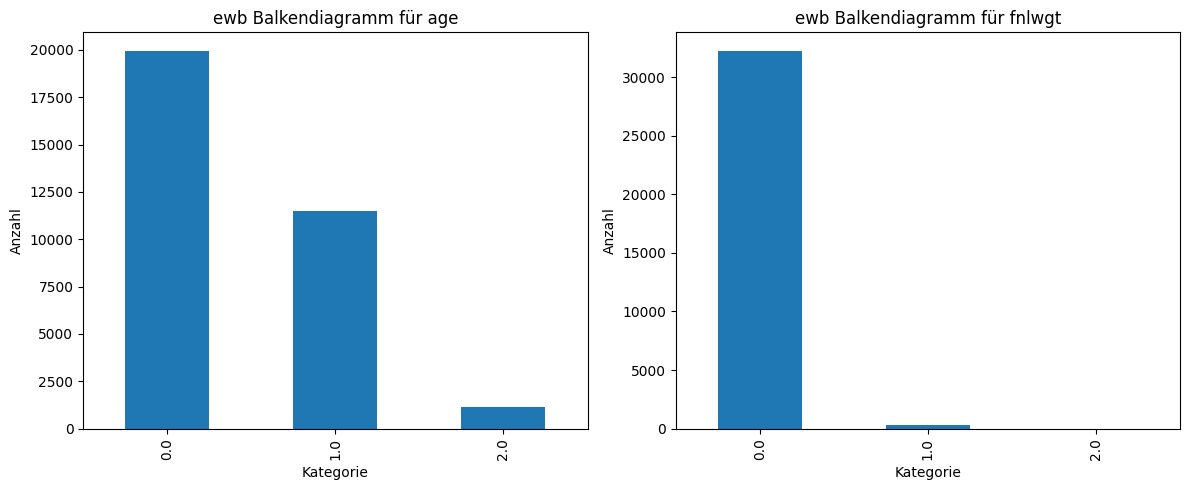

In [13]:
# Zeichnen wir ein Balkendiagramm aller features und vergleichen wir es mit den Originaldaten:
fig, axes = plt.subplots(1, len(num_data_12_ewb_cat.columns), figsize=(12, 5))
for i, col in enumerate(num_data_12_ewb_cat.columns):
    num_data_12_ewb_cat[col].value_counts().sort_index().plot.bar(ax=axes[i]) #die schleife zeichnet für jede spalte von "num_data_12_ewb_cat" ein Balkendiagramm der Häufigkeiten auf das jeweilige Subplot.
    axes[i].set_title(f'ewb Balkendiagramm für {col}')
    axes[i].set_xlabel('Kategorie')
    axes[i].set_ylabel('Anzahl')
plt.tight_layout()
plt.show()
# Die rechtsschiefe Verteilung ist ersichtlich

In [14]:
# Print the value counts for each feature:
for col in num_data_12_ewb_cat.columns:
    print(num_data_12_ewb_cat[col].value_counts())

age
0.0    19926
1.0    11477
2.0     1158
Name: count, dtype: int64
fnlwgt
0.0    32200
1.0      348
2.0       13
Name: count, dtype: int64


In [16]:
##### Equal Frequency Binning

# initialize
# strategy = 'quantile' (Equal Frequency Binning). Gleiche Anzahl Daten innerhalb Bins
efb = pre.KBinsDiscretizer(n_bins=3, strategy='quantile', encode='ordinal')
# fit
efb.fit(num_data_12_array)
print(efb.bin_edges_) # Zeigt die Bin Edges an
# transform
num_data_12_array_efb = efb.transform(num_data_12_array)

#Make categorical by converting to string:
num_data_12_array_efb_cat = num_data_12_array_efb.astype(str)

# Transform back to data frame:
num_data_12_efb_cat = pd.DataFrame(num_data_12_array_efb_cat, columns=num_data_12.columns)
num_data_12_efb_cat.info() # All features are categorical ('object')

[array([17., 31., 44., 90.])
 array([  12285.,  141067.,  210474., 1484705.])]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     32561 non-null  object
 1   fnlwgt  32561 non-null  object
dtypes: object(2)
memory usage: 508.9+ KB


C:\Users\Startklar\PycharmProjects\MLwithPython\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


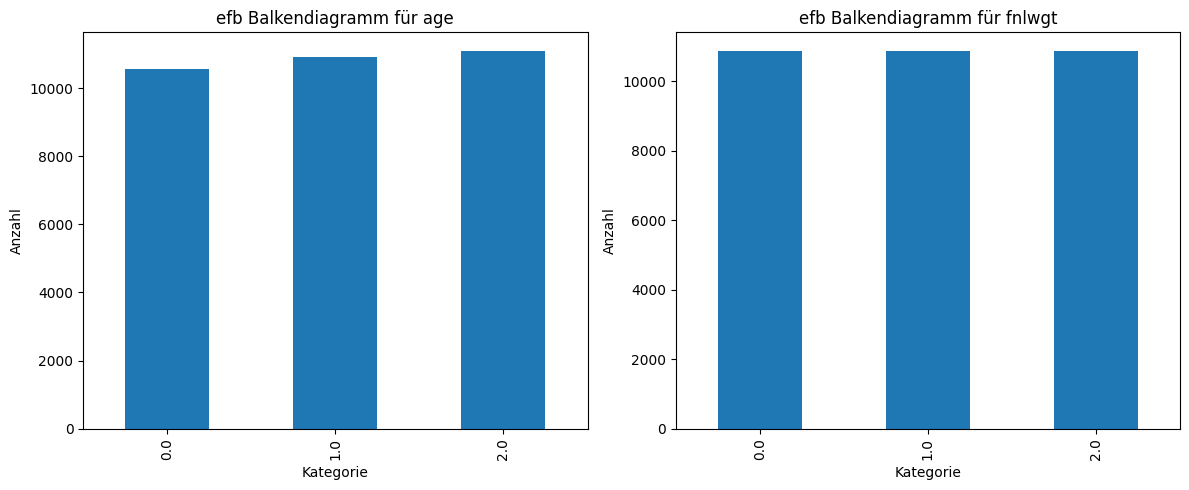

In [17]:
fig, axes = plt.subplots(1, len(num_data_12_efb_cat.columns), figsize=(12, 5))
for i, col in enumerate(num_data_12_efb_cat.columns): #"enumerate(num_data_12_efb_cat.columns)" liefert für jede Spalte den Index i und den Spaltennamen col.
    num_data_12_efb_cat[col].value_counts().sort_index().plot.bar(ax=axes[i])
    axes[i].set_title(f'efb Balkendiagramm für {col}')
    axes[i].set_xlabel('Kategorie')
    axes[i].set_ylabel('Anzahl')
plt.tight_layout()

In [18]:
# Print die werte counts für jedes feature:
for col in num_data_12_efb_cat.columns:
    print(num_data_12_efb_cat[col].value_counts())

age
2.0    11085
1.0    10904
0.0    10572
Name: count, dtype: int64
fnlwgt
2.0    10857
0.0    10854
1.0    10850
Name: count, dtype: int64


# ---------------------- Feature Selection ---------------

In [19]:
import sklearn.datasets as ds
import sklearn.feature_selection as fs
import sklearn.neighbors as nb

In [20]:
##### Generiert ein synthetisches datenset mit 60 features
#   Hinweise:
#       - X ist der input raum mit 60 columns.
#       - Y ist die binäre Zielvariablen (0,1).
X, y = ds.make_classification(n_samples=100, n_features=60, n_redundant=0, n_classes=2)

# Hinweis: Der output von ds.make_classification() ist ein ndarray
type(X)
type(y)

X.shape # (100, 60)

(100, 60)

In [21]:
######## Anwendung des univariaten Ansatzes mit der Filtermethode
# − Filtermethode ist unabhängig vom Algorithmus

# Initialize
kbest = fs.SelectKBest(score_func=fs.f_classif, k=15) # Wählt die 15 besten Features aus

# fit
kbest.fit(X, y)
# Im kbest sind die Qualitätsmetriken von score_func por Feature gespeichert

# transform
# die 15 Feature mit dem höchsten Score werden zurückgegeben
X_Kbest = kbest.transform(X)
X_Kbest.shape # (100, 15) - nur noch 15 Features

(100, 15)

# ------------------------------ Normalization -----------------------------

In [116]:
import sklearn.datasets as ds
import sklearn.preprocessing as pre
import pandas as pd
import matplotlib.pyplot as plt


In [117]:
iris = ds.load_iris() #ein Bunch wird geladen (Dictionary-ähnlich)

In [118]:
type(iris) # - Liefert  <class 'sklearn.utils.Bunch'> zurück

sklearn.utils._bunch.Bunch

In [119]:
iris.keys() #gibt die obersten Keys des Objekts zurück

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [120]:
print(iris.data)
type(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

numpy.ndarray

In [27]:
# Der Schlüssel „target“ speichert die Zielvariable als Numpy-Array:
print(iris.target)
type(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


numpy.ndarray

In [28]:
# Der Schlüssel „feature_names” speichert die Namen der Merkmale als Liste:
print(iris.feature_names)
type(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


list

In [29]:
# Wir verwenden nur die Eingabefunktionen von iris. Speichern wir sie in der Variablen X:
X = iris.data

In [32]:
##### 0-1-Normalisierung
#
# Min-Max-Normalisierung

#Nachteil der 0-1-Normalisierung:
# • Neue Datenobjekte können Merkmalswerte aufweisen, die außerhalb des Wertebereichs des Trainingssatzes liegen.
# • Nach der Transformation liegen ihre Werte außerhalb des Intervalls [0,1].

# initialize
min_max = pre.MinMaxScaler()
# fit
# der min und max - Wert pro Feature wird berechnet
min_max.fit(X)
# transform
# Die Daten werden gemäss 0-1 Normalisierung transformiert
X_min_max = min_max.transform(X) # Eine ndarray

In [36]:
##### Mu-Sigma-Methode:

# Wir verwenden den StandardScaler() aus dem Vorverarbeitungsmodul von sklearn.

# initialize
mu_sigma = pre.StandardScaler()
# fit
mu_sigma.fit(X) # Der Durchschnitt und Standardabweichung pro Feature wird berechnet
# transform
X_mu_sigma = mu_sigma.transform(X)  # Eine ndarray

In [37]:
##### Überprüfen Sie, ob es funktioniert hat

# Erstellen Sie einen data frame, um die Ergebnisse zu überprüfen, da Datenrahmen leichter zu lesen sind als ndarrays:
X_df = pd.DataFrame(X, columns=iris.feature_names)

# Wir machen dasselbe für die transformierten Daten.
X_min_max_df = pd.DataFrame(X_min_max, columns=iris.feature_names)
X_mu_sigma_df = pd.DataFrame(X_mu_sigma, columns=iris.feature_names)

In [40]:
# Wir können nun die statistischen Zusammenfassungen der Datensätze anzeigen:
X_df.describe()
X_min_max_df.describe() # min = 0 (niedrigster Wert des Features) and max = 1 (höchster Wert des Features)
X_mu_sigma_df.describe() # mean = 0, aber mean wird nie ganz 0 sein, wegen der Programmierung. Es wäre dann -1.4e-16 oder so.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


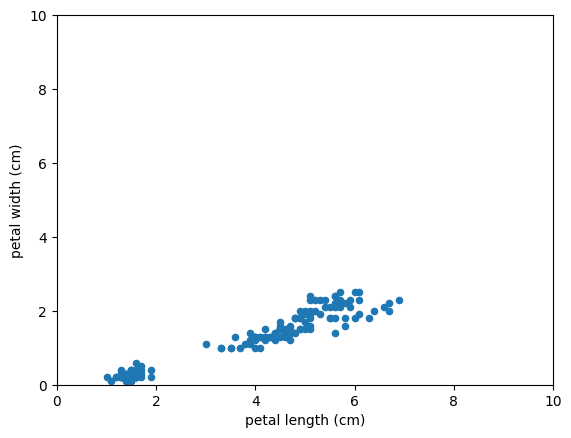

In [41]:
#Wir können jedes beliebige Paar von Eingabemerkmalen untersuchen – betrachten wir „Blütenblattlänge” gegenüber „Blütenblattbreite”.
# - x=‘Blütenblattlänge (cm)’
# - y='Blütenblattbreite (cm)'
plot_X = X_df.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter')
# We set the axis limits of the chart to the same lengths so that we can see the scales of the characteristics.
plot_X.set_xlim(0, 10)  # Set x-axis limits
plot_X.set_ylim(0, 10)  # Set y-axis limits
#
#   2. Zeichnen Sie die Grafik
#       plt.show() ist eine Funktion in Matplotlib, die die Grafik rendert.
#       block=True blockiert die weitere Ausführung Ihres Skripts, bis das Grafikfenster vom Benutzer geschlossen wird.
plt.show(block=True)

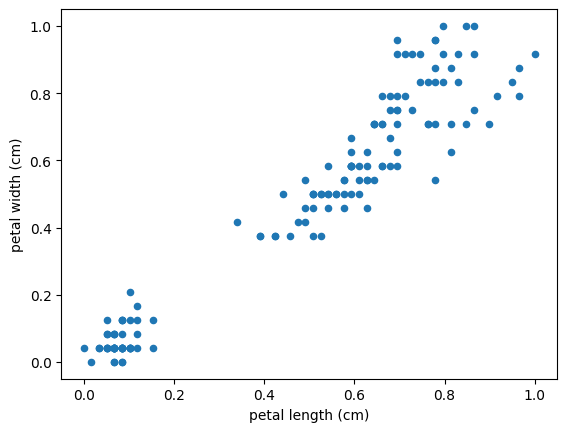

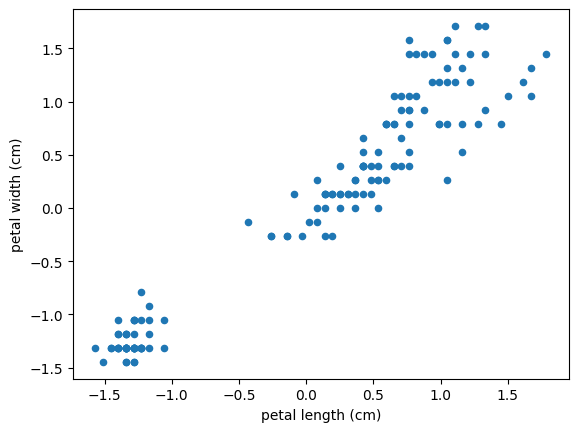

In [42]:
# Sehen wir uns die skalierten Daten als Plot an:
plot_X = X_min_max_df.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter')
plt.show(block=True)
plot_X = X_mu_sigma_df.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter')
plt.show(block=True)

Simple Imputation

In [121]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer #füllt missing values auf

data = {
        "A": [1.0, 2.0, np.nan, 4.0, 5.0],
        "B": [10.0, np.nan, 30.0, 40.0, 50.0],
        "C": [np.nan, 0.5, 0.7, np.nan, 1.0]
         }

type(data)
df = pd.DataFrame(data)
print(df)

     A     B    C
0  1.0  10.0  NaN
1  2.0   NaN  0.5
2  NaN  30.0  0.7
3  4.0  40.0  NaN
4  5.0  50.0  1.0


In [44]:
# Initialisieren Sie SimpleImputer mit der gewünschten Strategie.
imputer = SimpleImputer(strategy="mean") #median / modus
# Den Imputer auf den DataFrame anwenden und die Daten transformieren
imputed_array = imputer.fit_transform(df)
# Mittelwerte aller Feature wird berechnet und ersetzt die NAN-Werte

# Konvertieren Sie das resultierende Array zurück in einen DataFrame
imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
print(imputed_df)

     A     B         C
0  1.0  10.0  0.733333
1  2.0  32.5  0.500000
2  3.0  30.0  0.700000
3  4.0  40.0  0.733333
4  5.0  50.0  1.000000


kNeighborsClassifier

In [122]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [123]:
################ Load data

diabetes = pd.read_csv('../Data/diabetes.csv') 
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [124]:
# Feature-Werte und Target Variablen trennen:
X = diabetes.drop(columns=['Outcome']) # Verwende Pandas-Methode .drop, um die Zielspalte zu löschen
y = diabetes['Outcome'] # Verwende Klammernotation [], um nur die Zielspalte auszuwählen.

In [125]:
y = y.values #in ein Numpy-Array zu konvertieren

In [126]:
type(X) # pandas.core.frame.DataFrame
type(y) # numpy.ndarray

numpy.ndarray

In [127]:
################ "Lernt das k-NN model von den beispiel daten"

# intialize
knn = KNeighborsClassifier(n_neighbors=9) # Erstellt k-NN model mit k=9
# fit
knn_model = knn.fit(X, y)
# Im Model sind die Trainingsdaten und Anzahl Neighbor gespeichert

print(knn_model._fit_X) # Die Trainingsdaten vom k-NN model
print(knn_model._y) # Die Zielwerte von den Trainingsdaten
print(knn_model.n_neighbors) # Anzahl k

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [128]:
# 3. Predict
new_patient = np.array([[1, 123, 74, 4, 135, 39.4, 0.422, 44]]) # Neue Patientendaten als 1D-Numpy
new_patient = pd.DataFrame(new_patient, columns=X.columns) # In DataFrame mit denselben Spalten wie X konvertieren
prediction = knn_model.predict(new_patient)
# Im prediction ist ein Array mit den vorhergesagten Klassen gespeichert
print(f'The predicted outcome for the new patient (k= {knn_model.n_neighbors} ) is: {prediction}')

The predicted outcome for the new patient (k= 9 ) is: [0]


In [132]:
################  06 EXERCISE 1: UNGEWICHTET k-NN

# Vorteil von k-NN:
#− Einfach zu implementieren
# Nachteil von k-NN:
# − Die Klassifizierungszeit von k-NN steigt linear mit der Stichprobengröße (Verbindung zu Trainingsdaten)
# − Problematisch, wenn die Stichprobe dynamisch wächst

# initialize
knn_unweighted = KNeighborsClassifier(n_neighbors=1)  # Erstellt k-NN model mit k=1
# fit
knn_unweighted_model = knn_unweighted.fit(X, y)
# Im Model sind die Trainingsdaten und Anzahl Neighbor gespeichert
print(knn_unweighted_model._fit_X)  # Die Trainingsdaten vom k-NN model
print(knn_unweighted_model._y)  # Die Zielwerte von den Trainingsdaten
print(knn_unweighted_model.n_neighbors)  # Anzahl k
# predict
new_patient = np.array([[1, 123, 74, 4, 135, 39.4, 0.422, 44]])  # Neue Patientendaten als 1D-Numpy
new_patient = pd.DataFrame(new_patient, columns=X.columns)  # In DataFrame mit denselben Spalten wie X konvertieren
prediction_unweighted = knn_unweighted_model.predict(new_patient)
# Im prediction_unweighted ist ein Array mit den vorhergesagten Klassen gespeichert
print(f'The predicted outcome for the new patient (k= {knn_unweighted_model.n_neighbors} )  is: {prediction_unweighted}')

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [133]:
################ "Learn das GEWICHTETE k-NN model von den beispiel daten"
#
# • Möglichkeit nahen Datenobjekten mehr Einfluss zu geben indem Nähe faktorisiert wird

# intialize
knn_weighted = KNeighborsClassifier(n_neighbors=9, weights='distance') #mit K=9 und distanz gewichtet

# fit
knn_weighted_model = knn_weighted.fit(X, y)
# in diesem Model wird die Strategie (distance) gespeichert
# predict
new_patient_pred_w = knn_weighted_model.predict(new_patient) 
print(f"Predicted class value for the new patient (k={knn_weighted_model.n_neighbors}, weighted): {new_patient_pred_w}")

Predicted class value for the new patient (k=9, weighted): [0]


VSA for Model Selection

In [55]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [56]:
# Wir importieren das diabetes datenset wieder:
diabetes = pd.read_csv('../Data/diabetes.csv')

X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

y = y.values

In [58]:
################ Vorverarbeitung für den Validation Set Approach (VSA)
# 1. Teilen Sie den Datensatz in ein Trainingsset und ein Testset auf.
# stratify sorgt dafür, dass in Training-Set und Test die gleiche Verteilung von den Target Labels vorhanden sind
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23, stratify = y)
# Überprüfung der Datentypen der Trainings-/ Testaufteilungen noch einmal:
type(X_train) # pandas.core.frame.DataFrame
type(y_train) # numpy.ndarray
type(X_test)  # pandas.core.frame.DataFrame
type(y_test)  # numpy.ndarray
# Überprüfen Sie noch einmal die Formen der Trainings-/Testaufteilungen:
X_train.shape # (460, 8)
X_test.shape  # (308, 8)
y_train.shape # (460,)
y_test.shape  # (308,)  # Die Zielvariable für die Testdaten enthält ebenfalls 308 Einträge – einen pro Patient.

(308,)

In [59]:
################ "Lernt das k-NN model von den Trainingsdaten"
# intialize
knn = KNeighborsClassifier(n_neighbors=9)

# fit
knn_model = knn.fit(X_train, y_train)

# predict
y_test_pred = knn_model.predict(X_test)

print(y_test_pred) # Vorhergesagte Klassenwerte für die Testdaten (308 Einträge)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0
 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1]


In [61]:
############### Bewerten Sie die Vorhersageleistung des k-NN-Klassifikators Mithilfe von VSA.

R = knn_model.score(X_test, y_test)
# das knn_model wird verwendet um für X_test die Klassen vorausszusagen
# Das Resultat wird mit den True Classes (y_test) verglichen = Recognition Rate

print(f"Recognition Rate on the test set for k={knn_model.n_neighbors}: {R * 100:.1f}%")

Recognition Rate on the test set for k=9: 73.7%


In [62]:
################ Lernen und Bewerten des GEWICHTETEN k-NN-Modells mit VSA

knn_w = KNeighborsClassifier(n_neighbors=9, weights='distance')   # 1. Initialize
knn_model_w = knn_w.fit(X_train, y_train)                         # 2. Fit
y_pred_w = knn_model_w.predict(X_test)                            # 3. Predict
R_w = knn_model_w.score(X_test, y_test)                           # 4. Evaluate
print(f"Test Recognition Rate for k={knn_model_w.n_neighbors} (weighted): {R_w * 100:.1f}%")

Test Recognition Rate for k=9 (weighted): 74.0%


---Hyperparameter Optimalization---

In [63]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [64]:
diabetes = pd.read_csv('../Data/diabetes.csv')
X = diabetes.drop(columns=['Outcome'])  #den input herausgreifen
y = diabetes['Outcome'] #das ziel herausgreifen
y = y.values # Konvertieren Sie das Ziel in ein Numpy-Array.


################ Train/test split -> ca. test 20-40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23, stratify = y)


################ Lernen Sie das UNGEWICHTETE k-NN-Modell kennen
knn_uw = KNeighborsClassifier(n_neighbors=9)        # 1. Initialize
knn_model_uw = knn_uw.fit(X_train, y_train)         # 2. Fit
y_pred_uw = knn_model_uw.predict(X_test)            # 3. Predict
R_uw = knn_model_uw.score(X_test, y_test)           # 4. Evaluate
print(f"Test Recognition Rate for k={knn_model_uw.n_neighbors} (unweighted): {R_uw * 100:.1f}%")

Test Recognition Rate for k=9 (unweighted): 73.7%


In [65]:
############### 06 ÜBUNG 3: HYPERPARAMETER-OPTIMIERUNG für das ungewichtete k-NN unter Verwendung von VSA

#Vorgang zur Findung des optimalen hyperparameter k
k_values = [1, 5, 13, 61, 121, 201, 308]
for k in k_values:                                      # Für jedes K
    knn_uw = KNeighborsClassifier(n_neighbors=k)        # 1. Initialize
    knn_model_uw = knn_uw.fit(X_train, y_train)         # 2. Fit
    y_pred_uw = knn_model_uw.predict(X_test)            # 3. Predict
    R_uw = knn_model_uw.score(X_test, y_test)           # 4. Evaluate
    print(f"Test Recognition Rate for k={knn_model_uw.n_neighbors} (unweighted): {R_uw * 100:.1f}%")

Test Recognition Rate for k=1 (unweighted): 66.9%
Test Recognition Rate for k=5 (unweighted): 73.1%
Test Recognition Rate for k=13 (unweighted): 76.6%
Test Recognition Rate for k=61 (unweighted): 73.7%
Test Recognition Rate for k=121 (unweighted): 65.6%
Test Recognition Rate for k=201 (unweighted): 65.3%
Test Recognition Rate for k=308 (unweighted): 65.3%


#--------Decision Tree -------------

In [135]:
from matplotlib import pyplot as plt
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import tree

In [136]:
#### Load data
#   Wir verwenden den integrierten Iris-Datensatz aus sklearn.datasets
iris = ds.load_iris()
X = iris.data
y = iris.target

# X = Input variablen (features)
# y = Target variablen (klassen labels)

#### Fit a tree
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.25, random_state=23, stratify=y)
#"random_state=23" = Setzt einen festen Zufalls-Seed → Die Aufteilung ist reproduzierbar
#"stratify=y" = Sorgt dafür, dass die Klassenverteilung in y im Trainings- und Testdatensatz gleich bleibt.
# Besonders wichtig bei unausgeglichenen Klassen.

# initialize
# Erstellt einen Decision-Tree-Klassifikator:
# - criterion='gini' verwendet den Gini-Index zur Bewertung der besten Splits
# - random_state=0 sorgt für reproduzierbare Ergebnisse (gleiche Entscheidungen bei Ties und Zufällen)
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=0)
# fit
# Trainiert (fit) das Decision-Tree-Modell mit den Trainingsdaten:
# - X_train: Eingabedaten / Features
# - y_train: Zielwerte / Klassen
# Das trainierte Modell wird in der Variable 'model' gespeichert -> Trainingsdaten und Lernalgorithmus werden verworfen
model = clf.fit(X_train, y_train)
# predict
# Erzeugt Vorhersagen mit dem trainierten Modell:
# - train_pred: Vorhersagen für die Trainingsdaten (zur Bewertung des Trainings)
# - test_pred: Vorhersagen für die Testdaten (zur Bewertung der Generalisierung)
train_pred = model.predict(X_train)
# Im train_pred ist ein Array mit den vorhergesagten Klassen gespeichert
test_pred = model.predict(X_test)

In [ ]:
%%sql


In [137]:
# Den gelernten Baum bewerten
print("Unpruned tree:")
print("Accuracy on training set:",  model.score(X_train, y_train)) # 100% -> Overfitting
# model.score ruft auf dem Model predict auf und vergleicht das Resultat mit den wahren Klassen und gibt die Recognition Rate aus
print("Accuracy on test set:", model.score(X_test, y_test)) # 0.94

Unpruned tree:
Accuracy on training set: 1.0
Accuracy on test set: 0.9473684210526315


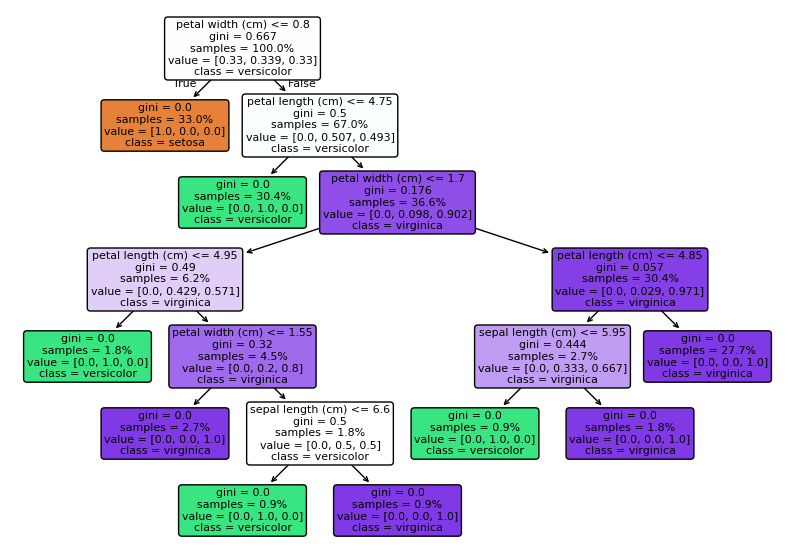

In [69]:
# Visualisierung des Baums
fig = plt.figure(figsize=(10,7))
tree.plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True, # Abgerundete node edges
          filled=True, # Fügt Farbe entsprechend der Klasse hinzu
          proportion=True); # Zeigt die Anteile der Klassenbeispiele anstelle der Gesamtzahl der Beispiele an.
#       3.  Rendern Sie die ausgefüllte Figur.
#           Es öffnet sich ein Fenster mit der visuellen Darstellung der Figur.
#           Wenn Sie ein interaktives Backend für matplotlib verwenden, wie z. B. „Qt5Agg”, können Sie mit der Grafik interagieren.
plt.show()
# Leaf Nodes sind alle rein

In [138]:
#### Beschneiden Sie den Baum, um Überanpassung zu vermeiden.


#       1. Initialisieren
#   - max_depth=3 bedeutet, dass maximal 3 aufeinanderfolgende Fragen gestellt werden können:
clf_pruned = tree.DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
# random_state bei DecisionTreeClassifier stellt sicher, dass die Trees bei Zufällen und Ties die genau gleiche Entscheidung treffen
#
#       2. Fit
# Trainiert (fit) den beschnittenen / vereinfachten Decision-Tree:
# - Ziel ist es, Overfitting zu reduzieren
# Das trainierte, beschnittene Modell wird in 'model_pruned' gespeichert
model_pruned = clf_pruned.fit(X_train, y_train)
#
#       3. Predict
# Erzeugt Vorhersagen mit dem trainierten Modell:
train_pred_pruned = model_pruned.predict(X_train)
test_pred_pruned = model_pruned.predict(X_test) # Generalisierung testen
#
#       4. Evaluate
print("Tree with max_depth=3:")
print("Accuracy on training set:",  model_pruned.score(X_train, y_train))
print("Accuracy on test set:", model_pruned.score(X_test, y_test))
print("")

Tree with max_depth=3:
Accuracy on training set: 0.9642857142857143
Accuracy on test set: 0.9210526315789473



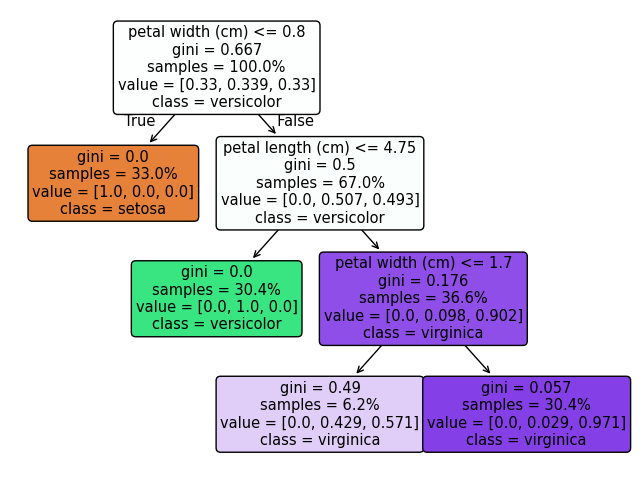

In [72]:
# Visualisierung des Baums
fig = plt.figure(figsize=(8,6))
tree.plot_tree(model_pruned,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True, # Abgerundete node edges
          filled=True, # Fügt Farbe entsprechend der Klasse hinzu
          proportion=True); # Zeigt die Anteile der Klassenbeispiele anstelle der Gesamtzahl der Beispiele an.
plt.show()
# Leaf Nodes sind nicht rein -> es gilt Majority Vote von den Nodes

In [139]:
##### Hyperparameter-Optimierung: Den Sweet Spot finden
# Los geht's:
highest_test_accuracy = 0
# best_depth = 0
for d in range(2, 8, 1): # von 2 bis 7 in Schritten von 1 ->  erzeugt 2, 3, 4, 5, 6, 7
        clf = tree.DecisionTreeClassifier(criterion='gini',
                                         random_state=0,
                                         max_depth=d)
        clf.fit(X_train, y_train)
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        print("depth=", d)
        print("Train accuracy:", train_accuracy)
        print("Test accuracy:", test_accuracy)
        print("")
        # Wenn wir eine bessere Punktzahl erzielt haben, speichern Sie die Punktzahl und die Parameter.
        if test_accuracy > highest_test_accuracy:
            highest_test_accuracy = test_accuracy
            best_depth = d
            best_model = clf
print("Best tree:")
print("depth=", best_depth)
print("Test accuracy:", highest_test_accuracy)

depth= 2
Train accuracy: 0.9642857142857143
Test accuracy: 0.9210526315789473

depth= 3
Train accuracy: 0.9642857142857143
Test accuracy: 0.9210526315789473

depth= 4
Train accuracy: 0.9821428571428571
Test accuracy: 0.9473684210526315

depth= 5
Train accuracy: 0.9910714285714286
Test accuracy: 0.9473684210526315

depth= 6
Train accuracy: 1.0
Test accuracy: 0.9473684210526315

depth= 7
Train accuracy: 1.0
Test accuracy: 0.9473684210526315

Best tree:
depth= 4
Test accuracy: 0.9473684210526315


# -------- VSA Decision Tree ---------

In [140]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

################ Load data
diabetes = pd.read_csv('../Data/diabetes.csv')

################ Präpariere die daten
X = diabetes.drop(columns=['Outcome']) # Die Eingabe herausgreifen
y = diabetes['Outcome'] # Das Ziel herausgreifen
y = y.values # Konvertieren Sie das Ziel in ein Numpy-Array.

In [141]:
################ Train/test/validation split  (60% train, 20% test, 20% val)
# Zunächst wird der Validierungssatz (20 % der Daten) abgetrennt (X_val, y_val)
# - 80 % verbleiben als temporäre Daten (X_temp, y_temp)
X_temp, X_val, y_temp, y_val = train_test_split(X, y, test_size=0.2, random_state=23, stratify = y)
# Dann die verbleibenden Daten („temp“) in Trainingsdaten (75 %) und Testdaten (25 %) aufteilen.
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23, stratify = y_temp)
# Hinweis: test_size=0,25, da 0,25 * 0,8 = 0,2, sodass der Testsatz 20 % der Gesamtdaten ausmacht.
# Trainingsdaten-Satz muss min. 50% von den ganzen Daten ausmachen

In [142]:
################ Hyperparameter Optimization for k-NN
k_values = [1, 5, 13, 61, 121, 201, 308]
knn_results = []  # Um die Erkennungsraten für jedes k zu speichern
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # 1. Initialize
    knn_model = knn.fit(X_train, y_train)  # 2. Fit
    R_knn = knn_model.score(X_test, y_test)  # 3. Evaluate
    knn_results.append(R_knn)
    print(f"Test Recognition Rate for k={k} (k-NN): {R_knn * 100:.1f}%")
# Find best k
best_k_index = knn_results.index(max(knn_results))  # wählt maximum aus den resultaten der recognition rate für kNN aus
best_k = k_values[best_k_index]
print(f"Best k for k-NN: {best_k} with Test Recognition Rate: {knn_results[best_k_index] * 100:.1f}%")

Test Recognition Rate for k=1 (k-NN): 71.4%
Test Recognition Rate for k=5 (k-NN): 76.6%
Test Recognition Rate for k=13 (k-NN): 76.6%
Test Recognition Rate for k=61 (k-NN): 71.4%
Test Recognition Rate for k=121 (k-NN): 70.8%
Test Recognition Rate for k=201 (k-NN): 64.9%
Test Recognition Rate for k=308 (k-NN): 64.9%
Best k for k-NN: 5 with Test Recognition Rate: 76.6%


In [76]:
################ Hyperparameter Optimization for Classification Tree
depth_values = [1, 3, 5, 7, 9, 11, 13]
tree_results = []  # Um die Erkennungsraten für jede max_depth zu speichern
for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=23)  # 1. Initialize
    tree_model = tree.fit(X_train, y_train)  # 2. Fit
    R_tree = tree_model.score(X_test, y_test)  # 3. Evaluate
    # Fügt die berechnete Test-Accuracy des Decision-Trees
    # der Ergebnisliste hinzu (z. B. zum späteren Vergleichen
    # verschiedener Baumtiefen oder Modelle)
    tree_results.append(R_tree)
    #gibt die verschiedenen resultate für die recognition rate aus
    print(f"Test Recognition Rate for max_depth={depth} (Decision Tree): {R_tree * 100:.1f}%")
# Findet das Model mit dem höchsten Test Accuracy
best_depth_index = tree_results.index(
    max(tree_results))  #wählt den besten decision tree anhand der besten recognition rate aus
best_depth = depth_values[best_depth_index]
print(
    f"Best max_depth for Decision Tree: {best_depth} with Test Recognition Rate: {tree_results[best_depth_index] * 100:.1f}%")

Test Recognition Rate for max_depth=1 (Decision Tree): 77.9%
Test Recognition Rate for max_depth=3 (Decision Tree): 74.0%
Test Recognition Rate for max_depth=5 (Decision Tree): 68.8%
Test Recognition Rate for max_depth=7 (Decision Tree): 70.8%
Test Recognition Rate for max_depth=9 (Decision Tree): 66.9%
Test Recognition Rate for max_depth=11 (Decision Tree): 67.5%
Test Recognition Rate for max_depth=13 (Decision Tree): 66.9%
Best max_depth for Decision Tree: 1 with Test Recognition Rate: 77.9%


In [77]:
# CV Application Case 1

In [78]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold  # für cross-validation
from sklearn.neighbors import KNeighborsClassifier

################ Load the data
diabetes = pd.read_csv('../Data/diabetes.csv')

################ Data vorbereiten
X = diabetes.drop(columns=['Outcome'])  #Eingabe herausgreifen
y = diabetes['Outcome']  # Ziel herausgreifen
y = y.values  # Konvertiert ziel zu numpy array


In [81]:
# HINWEIS:
# - Wir müssen die Daten nicht in Trainings- und Validierungssätze aufteilen -> Cross Validation
# Folds stellen sicher, dass die Aussagekraft der Error Rates höher wird, jedoch kann es bei zu vielen Folds zu mehreren Überschneidungen
# der einzelnen Folds kommen. Dadurch könnte die Aussagekraft abnehmen. -> Best Practise: 5 oder 10 Folds

knn = KNeighborsClassifier(n_neighbors=9)  # Initialize
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-faltung CV auf den gesamte datensatz "cv=5" (gibt in reality 5 oder 10-faltung CV)
# scores hat ein Array mit allen Test Error Rates
mean_score = np.mean(scores)  # mittlere Genauigkeit über die Folds berechnen -> Cross-validated Error Rates
print(f"Cross-Validation Recognition Rate for k=9: {mean_score * 100:.1f}%")


Cross-Validation Recognition Rate for k=9: 74.2%


In [84]:
################ Trainieren Sie das Modell mit dem gesamten Datensatz.
best_knn = KNeighborsClassifier(n_neighbors=9) # Initialize
best_knn_model = best_knn.fit(X, y) # Fit
print("The k-NN model has been trained on the entire data set. It can now be used for predictions.")


The k-NN model has been trained on the entire data set. It can now be used for predictions.


# CV Application Case 2

In [85]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold  # For cross-validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

################ Load data
diabetes = pd.read_csv('../Data/diabetes.csv')

################ Prepare data
X = diabetes.drop(columns=['Outcome']) # Die Eingabe herausgreifen
y = diabetes['Outcome'] # Das Ziel herausgreifen
y = y.values # Konvertieren Sie das Ziel in ein Numpy-Array.

In [86]:
################ Kreuzvalidierung von 9-NN auf dem gesamten Datensatz
knn = KNeighborsClassifier(n_neighbors=9)  # Initialize
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-faltung CV auf gesamtes datenset
mean_score_knn = np.mean(scores)  # Berechnen Sie die durchschnittliche Genauigkeit über alle Folds hinweg.
print(f"Cross-Validation Recognition Rate for k=9: {mean_score_knn * 100:.1f}%")


Cross-Validation Recognition Rate for k=9: 74.2%


In [87]:
############### Cross-Validation of Classification Tree with max_depth=5 on the entire data set
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

treee = DecisionTreeClassifier(max_depth=5,
                               random_state=23)  # Initialize -> random_state stellt sicher, dass bei Tie-Entscheidungen immer die gleiche
# Entscheidung getroffen wird z.B. bei gleich guter Gini-Index
scores = cross_val_score(treee, X, y, cv=5, scoring='accuracy')  # 5-fold CV on the entire data set -> Array
mean_score_tree = np.mean(scores)  # calculate mean accuracy across folds
print(
    f"Cross-Validation Recognition Rate for Classification Tree with max_depth=5: {mean_score_tree * 100:.1f}%")  #75.1%

Cross-Validation Recognition Rate for Classification Tree with max_depth=5: 75.1%


In [123]:
################ Vergleichen Sie die beiden Modelle anhand ihrer CV-Erkennungsraten.
if mean_score_tree > mean_score_knn:
    print("The Classification Tree with max_depth=5 performs better than the 9-NN model.")
else:
    print("The 9-NN model performs better than the Classification Tree with max_depth=5.")


The Classification Tree with max_depth=5 performs better than the 9-NN model.


In [88]:
################ Trainieren Sie das beste Modell für den gesamten Datensatz.
dtree_model = treee.fit(X, y)
print("The best model has been trained on the entire data set.")


The best model has been trained on the entire data set.


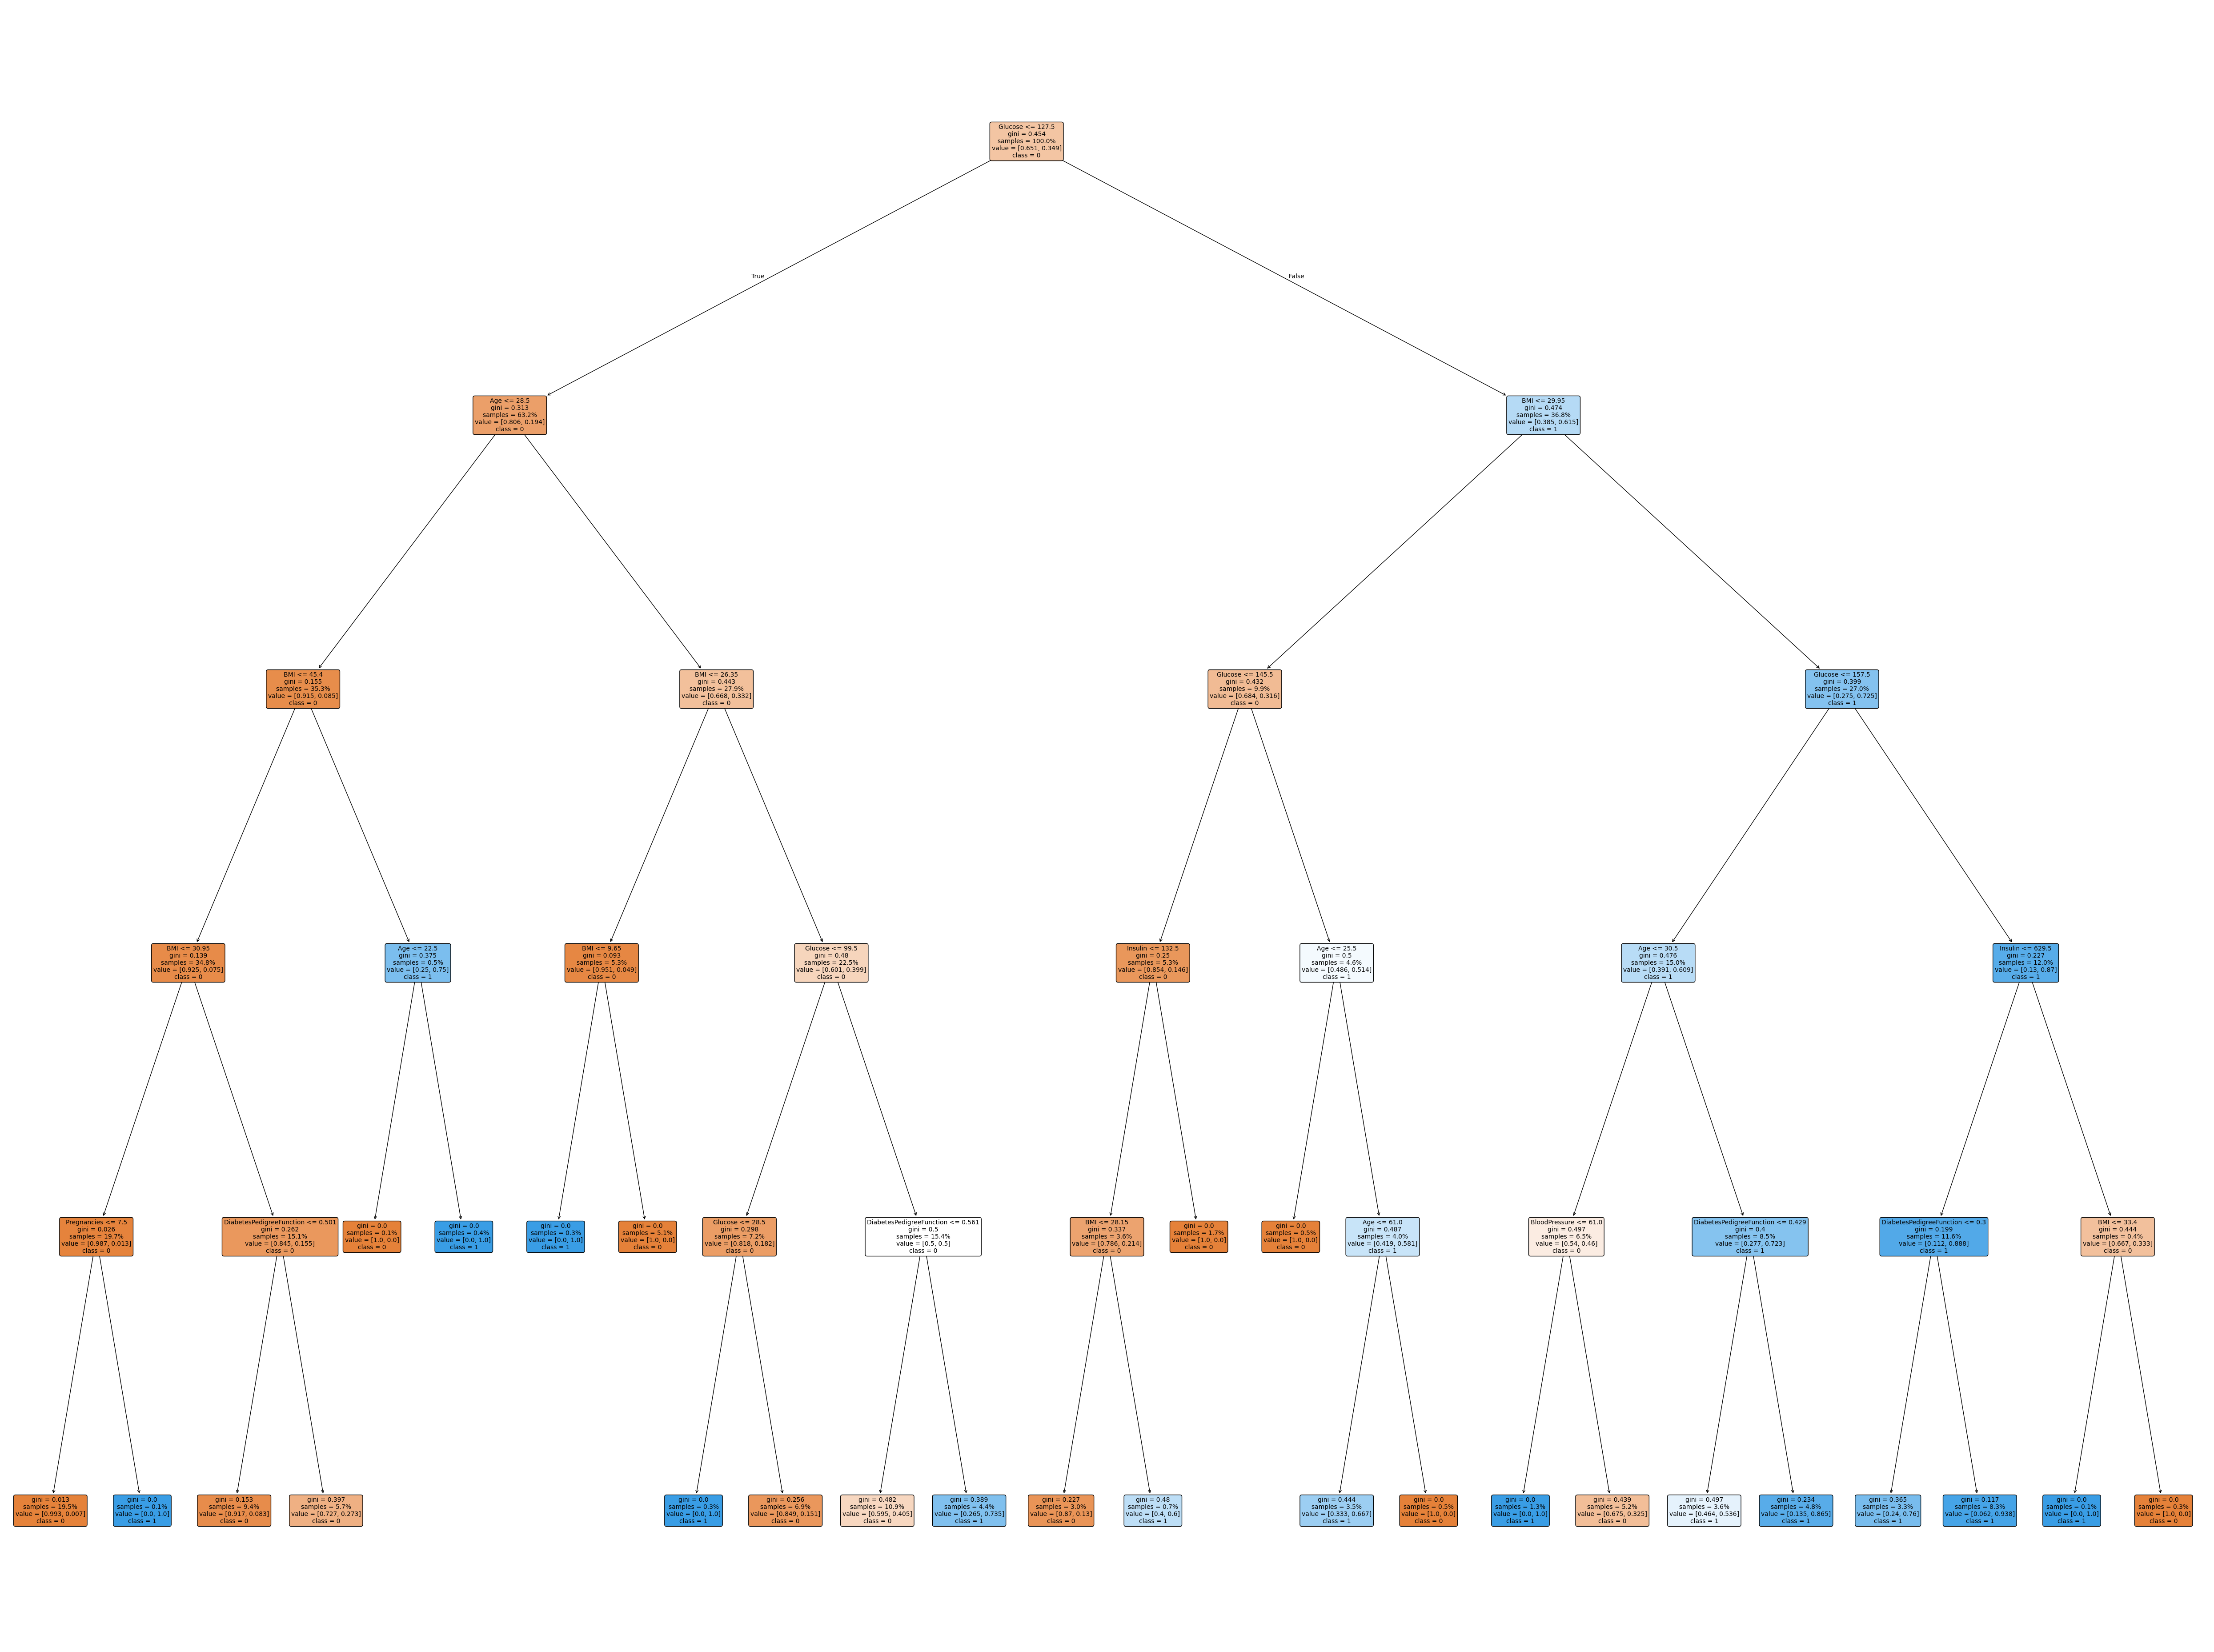

In [89]:
#Visualisieren Sie das beste Klassifikationsbaummodell (nur zur Veranschaulichung).
# Visualisiert den Decision-Tree als Diagramm:
# - fig = plt.figure(...) legt die Größe und Auflösung der Grafik fest
# - tree.plot_tree(...) zeichnet den Baum
#   - feature_names: Spaltennamen der Eingabedaten
#   - class_names: Klassennamen (hier aus den eindeutigen Werten von y)
#   - rounded=True: abgerundete Knoten
#   - filled=True: Knoten farblich nach Klassenverteilung ausgefüllt
#   - proportion=True: Knotenfarben proportional zur Klassenhäufigkeit
#   - fontsize=10: Schriftgröße im Diagramm
fig = plt.figure(figsize=(64,48), dpi=100)
tree.plot_tree(dtree_model,
          feature_names=X.columns,
          class_names=[str(cls) for cls in np.unique(y)],
          rounded=True,
          filled=True,
          proportion=True,
          fontsize=10);
plt.show()

CV Application Case 3


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold  # Für cross-validation
from sklearn.neighbors import KNeighborsClassifier

################ Load data
diabetes = pd.read_csv('../Data/diabetes.csv')

################ Datenvorberitung
X = diabetes.drop(columns=['Outcome']) # Input herausgreifen
y = diabetes['Outcome'] # Ziel herausgreifen
y = y.values # Konvertierung des Ziels als numpy array

################ Train/validation split  (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=23, stratify = y)

################ Hyperparameteroptimierung für k-NN mit Kreuzvalidierung auf dem Trainingssatz
k_values = [1, 5, 13, 61, 121, 201, 308] # verschiedene werte für k welche später überprüft werden
cv_results = []  # speichert die Kreuzvalidierungs-Erkennungsraten für jedes k


In [92]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize
# - cv=5: 5-fache Kreuzvalidierung (Daten werden in 5 Teile geteilt)
# - scoring='accuracy': Bewertet die Genauigkeit (Anteil korrekt klassifizierter Beispiele)
# - Das Ergebnis 'scores' enthält die Genauigkeit für jede der 5 Faltungen
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)  # berechnet durchschnitt genauigkeit aller folds
    cv_results.append(mean_score) # speichert mean score
    print(f"Cross-Validation Recognition Rate for k={k}: {mean_score * 100:.1f}%")

# Finde best k wert basiert auf cross-validation resultate
best_k_index = cv_results.index(max(cv_results))
best_k = k_values[best_k_index]
print(f"Best k for k-NN (CV): {best_k} with Cross-Validation Recognition Rate: {cv_results[best_k_index] * 100:.1f}%")


Cross-Validation Recognition Rate for k=1: 67.1%
Cross-Validation Recognition Rate for k=5: 71.7%
Cross-Validation Recognition Rate for k=13: 75.2%
Cross-Validation Recognition Rate for k=61: 71.3%
Cross-Validation Recognition Rate for k=121: 69.1%
Cross-Validation Recognition Rate for k=201: 65.1%
Cross-Validation Recognition Rate for k=308: 65.1%
Best k for k-NN (CV): 13 with Cross-Validation Recognition Rate: 75.2%


In [93]:
################ Trainieren Sie das beste k-NN-Modell auf dem Trainingssatz.
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
print("The best k-NN model has been trained on the Training Set.")

################ Bewerten Sie das beste k-NN-Modell im Validierungssatz.
R_val = best_knn.score(X_val, y_val)
print(f"Validation Set Recognition Rate for the best k-NN model (k={best_k}): {R_val * 100:.1f}%")

The best k-NN model has been trained on the Training Set.
Validation Set Recognition Rate for the best k-NN model (k=13): 72.1%


CV Application Case 4

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score  # Für die Kreuzvalidierung
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

################ Load data
diabetes = pd.read_csv('../Data/diabetes.csv')

################ Datenvorbereitung
X = diabetes.drop(columns=['Outcome']) # Input herausgreifen
y = diabetes['Outcome'] # Ziel herausgreifen
y = y.values # Konvertieren des Zils als numpy array

################ Train/validation split  (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=23, stratify = y)


################ Hyperparameteroptimierung für k-NN mit Kreuzvalidierung auf dem Trainingssatz
k_values = [1, 5, 13, 61, 121, 201, 308]
cv_results = []  # speichert die Kreuzvalidierungs-Erkennungsraten für jedes k


In [95]:
# K-NN Hyperparameter Optimierung
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize
# - cv=5: 5-fache Kreuzvalidierung (Daten werden in 5 Teile geteilt)
# - scoring='accuracy': Bewertet die Genauigkeit (Anteil korrekt klassifizierter Beispiele)
# - Das Ergebnis 'scores' enthält die Genauigkeit für jede der 5 Faltungen
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV auf das training set
    mean_score = np.mean(scores)  # berechnet durchschnittliche genauigkeit über alle folds
    cv_results.append(mean_score) # speichert die mean scores
    print(f"Cross-Validation Recognition Rate for k={k}: {mean_score * 100:.1f}%")

# Finden Sie das beste k basierend auf den Ergebnissen der Kreuzvalidierung.
best_k_index = cv_results.index(max(cv_results))
best_k = k_values[best_k_index]
print(f"Best k for k-NN (CV): {best_k} with Cross-Validation Recognition Rate: {cv_results[best_k_index] * 100:.1f}%")


Cross-Validation Recognition Rate for k=1: 67.1%
Cross-Validation Recognition Rate for k=5: 71.7%
Cross-Validation Recognition Rate for k=13: 75.2%
Cross-Validation Recognition Rate for k=61: 71.3%
Cross-Validation Recognition Rate for k=121: 69.1%
Cross-Validation Recognition Rate for k=201: 65.1%
Cross-Validation Recognition Rate for k=308: 65.1%
Best k for k-NN (CV): 13 with Cross-Validation Recognition Rate: 75.2%


In [96]:
# Classification Tree Hyperparameter Optimierung
depth_values = [1, 3, 5, 7, 9, 11, 13]
cv_results = []  # speichert die cross-validation recognition rate for jede max_depth

for depth in depth_values:
    # Modell initialisieren:
    # - max_depth=depth: maximale Tiefe des Baums (kontrolliert Modellkomplexität)
    # - random_state=23: sorgt für reproduzierbare Ergebnisse bei zufälligen Entscheidungen im Baum
    tree = DecisionTreeClassifier(max_depth=depth, random_state=23)
# - cv=5: 5-fache Kreuzvalidierung (Daten werden in 5 Teile geteilt)
# - scoring='accuracy': Bewertet die Genauigkeit (Anteil korrekt klassifizierter Beispiele)
# - Das Ergebnis 'scores' enthält die Genauigkeit für jede der 5 Faltungen
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')  # 5-fache CV
    mean_score = np.mean(scores)  # Durchschnittliche Erkennungsrate berechnen
    cv_results.append(mean_score)
    print(f"Cross-Validation Recognition Rate for max_depth={depth}: {mean_score * 100:.1f}%")

# Finde beste max_depth
best_depth_index = cv_results.index(max(cv_results))
best_depth = depth_values[best_depth_index]
print(f"Best max_depth for Decision Tree (CV): {best_depth} with Cross-Validation Recognition Rate: {cv_results[best_depth_index] * 100:.1f}%")


Cross-Validation Recognition Rate for max_depth=1: 71.0%
Cross-Validation Recognition Rate for max_depth=3: 71.3%
Cross-Validation Recognition Rate for max_depth=5: 73.3%
Cross-Validation Recognition Rate for max_depth=7: 73.0%
Cross-Validation Recognition Rate for max_depth=9: 72.5%
Cross-Validation Recognition Rate for max_depth=11: 69.7%
Cross-Validation Recognition Rate for max_depth=13: 71.5%
Best max_depth for Decision Tree (CV): 5 with Cross-Validation Recognition Rate: 73.3%


In [97]:
best_knn = KNeighborsClassifier(n_neighbors=best_depth)  # Initialize
best_knn_model = best_knn.fit(X_train, y_train)

best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=23)  # Initialize
best_tree_model = best_tree.fit(X_train, y_train)


################ Selektiere best of the best

# Wir vergleichen die Recognition Rates der besten k-NN mit dem besten Classification Tree on the Validation Set
R_best_knn = best_knn.score(X_val, y_val)
R_best_tree = best_tree.score(X_val, y_val)
print(f"Best k-NN Validation Recognition Rate: {R_best_knn * 100:.1f}%")
print(f"Best Classification Tree Validation Recognition Rate: {R_best_tree * 100:.1f}%")

## Ermittle the best of the best
if R_best_knn > R_best_tree:
    print(f"The best model is k-NN with k={best_k} achieving a Validation Recognition Rate of {R_best_knn * 100:.1f}%")
else:
    print(f"The best model is Classification Tree with max_depth={best_depth} achieving a Validation Recognition Rate of {R_best_tree * 100:.1f}%")



Best k-NN Validation Recognition Rate: 67.5%
Best Classification Tree Validation Recognition Rate: 68.8%
The best model is Classification Tree with max_depth=5 achieving a Validation Recognition Rate of 68.8%


# ANN

In [98]:
# ANN
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# ========= DATEN VORBEREITUNG =========

# Wir importieren die Diabetesdaten (ursprünglich von Kaggle) mit pandas.
diabetes = pd.read_csv('../Data/diabetes.csv')

# Separiere input features von ziel variable
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome'].values

# Teile die daten auf training and test set auf
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.4, random_state=23)


In [99]:
# Es ist wichtig, die Daten vor der Verwendung neuronaler Netze zu skalieren.
#   - StandardScaler() standardisiert die Merkmale. Das heißt, es skaliert jedes Merkmal so, dass es einen Mittelwert von Null und eine Varianz von Eins hat.
scaler = StandardScaler()

# - Berechnet Mittelwert und Standardabweichung aus X_train
# - Skaliert die Daten, sodass jedes Feature Mittelwert 0 und Std 1 hat
X_train = scaler.fit_transform(X_train)

# - Verwendet Mittelwert und Standardabweichung aus den Trainingsdaten
# - Dadurch werden Testdaten auf dieselbe Skala wie Trainingsdaten gebracht
# - Vermeidet Daten-Leakage, da Testdaten nicht zum Fitten des Scalers verwendet werden
X_test = scaler.transform(X_test)

In [100]:
# ========= TRAINING EINES NEURONALEN NETZWERK-KLASSIFIZIERERS =========

# Erstellt einen Multi-Layer Perceptron (MLP) Klassifikator:
# - MLP ist ein künstliches neuronales Netzwerk für Klassifikationsaufgaben
# - verbose=True zeigt während des Trainings Fortschrittsmeldungen an
mlp = MLPClassifier(verbose=True)

# - X_train: Eingabedaten / Features
# - y_train: Zielwerte / Klassen
# Das Modell passt seine Gewichte an, um die Trainingsdaten bestmöglich zu lernen
mlp.fit(X_train, y_train)

# Macht Vorhersagen mit dem trainierten MLP-Modell auf den Testdaten:
# - X_test: Eingabedaten des Testdatensatzes
# - predictions enthält die vorhergesagten Klassen für jedes Testbeispiel
predictions = mlp.predict(X_test)
print(predictions)
print("Accuracy:", mlp.score(X_test, y_test)) # evaluiert (Recognition Rate)

Iteration 1, loss = 0.66682941
Iteration 2, loss = 0.64484320
Iteration 3, loss = 0.62651212
Iteration 4, loss = 0.61092410
Iteration 5, loss = 0.59605937
Iteration 6, loss = 0.58448515
Iteration 7, loss = 0.57327718
Iteration 8, loss = 0.56352752
Iteration 9, loss = 0.55477556
Iteration 10, loss = 0.54719061
Iteration 11, loss = 0.54005186
Iteration 12, loss = 0.53416176
Iteration 13, loss = 0.52802385
Iteration 14, loss = 0.52301050
Iteration 15, loss = 0.51829438
Iteration 16, loss = 0.51388655
Iteration 17, loss = 0.50996480
Iteration 18, loss = 0.50632522
Iteration 19, loss = 0.50296593
Iteration 20, loss = 0.49983552
Iteration 21, loss = 0.49683327
Iteration 22, loss = 0.49399012
Iteration 23, loss = 0.49137678
Iteration 24, loss = 0.48922295
Iteration 25, loss = 0.48672269
Iteration 26, loss = 0.48460023
Iteration 27, loss = 0.48254729
Iteration 28, loss = 0.48063701
Iteration 29, loss = 0.47893117
Iteration 30, loss = 0.47695158
Iteration 31, loss = 0.47528247
Iteration 32, los

C:\Users\Startklar\PycharmProjects\MLwithPython\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [101]:
mlp = MLPClassifier(verbose=True) # initialize
mlp.fit(X_train, y_train) # fit
print("Accuracy:", mlp.score(X_train, y_train)) # evaluate (Recognition Rate)
print("Accuracy:", mlp.score(X_test, y_test)) # evaluate (Recognition Rate)


Iteration 1, loss = 0.64316500
Iteration 2, loss = 0.62686184
Iteration 3, loss = 0.61213002
Iteration 4, loss = 0.59958198
Iteration 5, loss = 0.58781822
Iteration 6, loss = 0.57711170
Iteration 7, loss = 0.56776537
Iteration 8, loss = 0.55896821
Iteration 9, loss = 0.55122775
Iteration 10, loss = 0.54486987
Iteration 11, loss = 0.53819882
Iteration 12, loss = 0.53279227
Iteration 13, loss = 0.52746937
Iteration 14, loss = 0.52284533
Iteration 15, loss = 0.51808969
Iteration 16, loss = 0.51419485
Iteration 17, loss = 0.51060872
Iteration 18, loss = 0.50685166
Iteration 19, loss = 0.50386544
Iteration 20, loss = 0.50079908
Iteration 21, loss = 0.49809012
Iteration 22, loss = 0.49559682
Iteration 23, loss = 0.49312818
Iteration 24, loss = 0.49076875
Iteration 25, loss = 0.48884932
Iteration 26, loss = 0.48662751
Iteration 27, loss = 0.48478239
Iteration 28, loss = 0.48301726
Iteration 29, loss = 0.48125266
Iteration 30, loss = 0.47949960
Iteration 31, loss = 0.47797404
Iteration 32, los

C:\Users\Startklar\PycharmProjects\MLwithPython\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hierachical Clustering

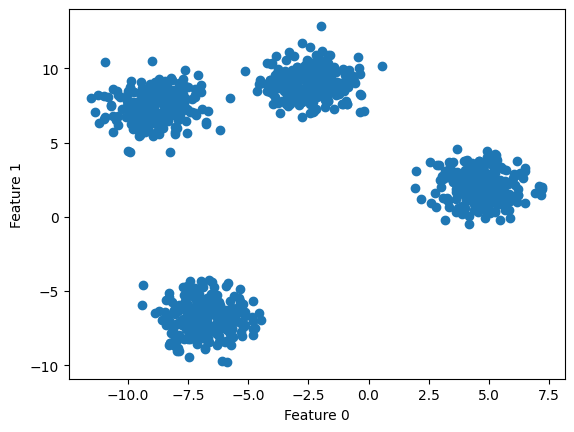

In [102]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import single, complete

# Erstellt einen synthetischen Datensatz für Klassifikationstests:
# - n_samples=1000: Anzahl der Datenpunkte
# - centers=4: Anzahl der Cluster
# - n_features=2: Anzahl der Features pro Punkt
# - random_state=42: sorgt für reproduzierbare Ergebnisse
# - X enthält die Feature-Werte, y die zugehörigen Klassenlabels
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

# Visualisiert die Struktur der Daten in einem Streudiagramm (Scatterplot):
# - Jede Klasse wird durch unterschiedliche Farben dargestellt
# - Hilft zu erkennen, wie die Datenpunkte verteilt und getrennt sind
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

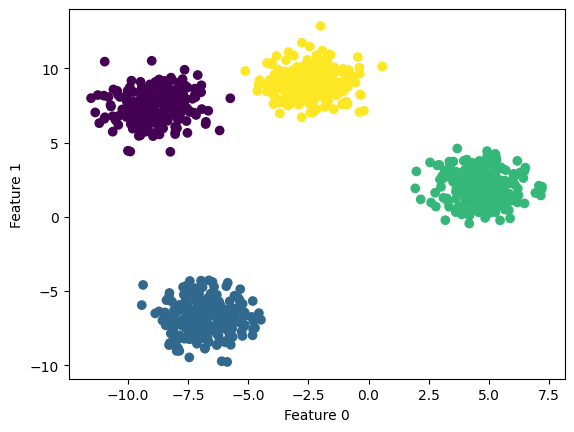

In [104]:
############# Fit (lernt) eine hierarchisches clustering model

# Initialize
# Erstellt ein hierarchisches Clustering-Modell:
# - AgglomerativeClustering = Bottom-up Ansatz (startet mit einzelnen Punkten)
# - linkage="complete": Abstand zwischen Clustern wird durch größten Abstand zwischen ihren Punkten bestimmt
# - n_clusters=4: gewünschte Anzahl der Cluster
agg = AgglomerativeClustering(linkage="complete", n_clusters=4)

# Fit and predict
# Wendet das Agglomerative Clustering auf die Daten an und gibt die Clusterzuweisungen zurück:
# - fit_predict(X) trainiert das Modell und weist jedem Punkt einen Cluster-Index zu
# - assignment enthält für jeden Datenpunkt die zugehörige Cluster-Nummer (0 bis n_clusters-1)
assignment = agg.fit_predict(X)
# assignment ist eine Array mit allen vorhergesagten Klassen

################ Visuell check die clustering resultate
# Visualisiert die Cluster-Zuordnungen in einem Streudiagramm:
# - Jeder Punkt wird nach seinem zugewiesenen Cluster (assignment) eingefärbt
# - X[:, 0] und X[:, 1] sind die beiden Features
plt.scatter(X[:, 0], X[:, 1], c=assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [105]:
# Finde optimale anzahl an clusters
for k in range(2, 8):
# Führt Agglomerative Clustering durch und bewertet die Qualität der Cluster:
    # - linkage="complete": verwendet den größten Abstand zwischen Punkten zweier Cluster
    # - n_clusters=k: gewünschte Anzahl der Cluster
    # - fit_predict(X) trainiert das Modell und gibt die Clusterzuweisungen zurück
    # - silhouette_score(X, assignment) berechnet den Silhouettenwert:
     agg = AgglomerativeClustering(linkage="complete", n_clusters=k)
     assignment = agg.fit_predict(X)
     score = silhouette_score(X, assignment)
     print("K =", k, "Silhouette Score =", score)

K = 2 Silhouette Score = 0.5499450223181329
K = 3 Silhouette Score = 0.7521964163365819
K = 4 Silhouette Score = 0.7915983870089952
K = 5 Silhouette Score = 0.6601830333096623
K = 6 Silhouette Score = 0.5127298309560596
K = 7 Silhouette Score = 0.43894325892156316


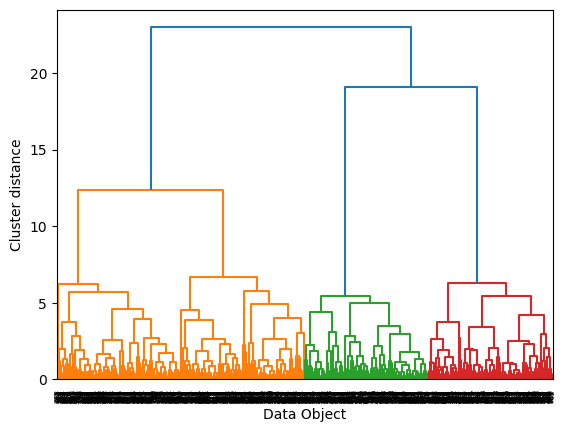

In [106]:
################ Plote das Dendogram
# Berechnet die vollständigen Linkage-Abstände für hierarchisches Clustering:
# - complete(X) verwendet die "complete linkage"-Methode (maximaler Abstand zwischen Punkten zweier Cluster)
# - linkages_array enthält die Distanzen und Informationen, die später z.B. für ein Dendrogramm verwendet werden können
linkage_array = complete(X)

# Jetzt können wir das Dendrogramm mit der Funktion dendogram() zeichnen:
dendrogram(linkage_array)
plt.xlabel("Data Object")
plt.ylabel("Cluster distance")
plt.show()

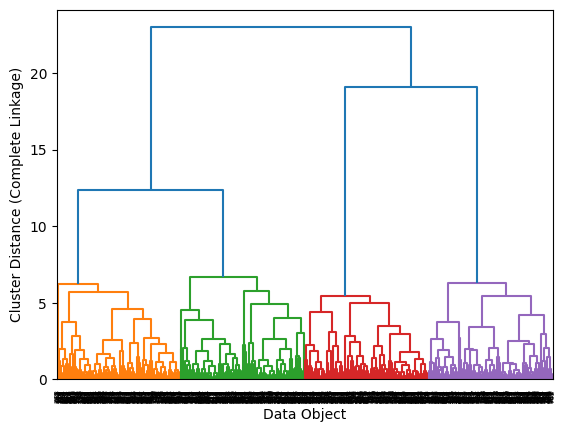

In [107]:
# Zeichnet ein Dendrogramm basierend auf den berechneten Linkage-Abständen:
# - linkage_array enthält die hierarchischen Abstände zwischen Clustern
# - color_threshold=10 färbt die Cluster im Dendrogramm basierend auf diesem Schwellenwert
#   (Cluster unterhalb des Thresholds erhalten die gleiche Farbe)
dendrogram(linkage_array, color_threshold=10)
plt.xlabel("Data Object")
plt.ylabel("Cluster Distance (Complete Linkage)")
plt.show()